## Тема “Обучение без учителя”

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [58]:
from sklearn.datasets import load_boston

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

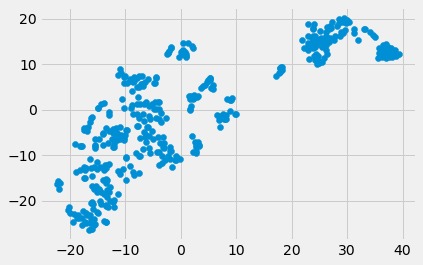

In [15]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [16]:
from sklearn.cluster import KMeans

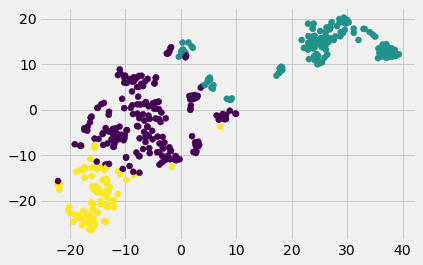

In [60]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [63]:
for cluster in range(3):
    print(f'{cluster=}: {y_train[labels_train==cluster].mean()=}')

cluster=0: y_train[labels_train==cluster].mean()=24.958115183246072
cluster=1: y_train[labels_train==cluster].mean()=16.165354330708663
cluster=2: y_train[labels_train==cluster].mean()=27.78837209302326


In [62]:
for cluster in range(3):
    print(f'{cluster=}: {X_train[labels_train==cluster]["CRIM"].mean()=}')

cluster=0: X_train[labels_train==cluster]["CRIM"].mean()=0.42166020942408367
cluster=1: X_train[labels_train==cluster]["CRIM"].mean()=10.797028425196853
cluster=2: X_train[labels_train==cluster]["CRIM"].mean()=0.07356558139534886


***Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [66]:
labels_test = kmeans.fit_predict(X_test_scaled)

for cluster in range(3):
    print(f'{cluster=}: {y_test[labels_test==cluster].mean()=}')

cluster=0: y_test[labels_test==cluster].mean()=16.710526315789473
cluster=1: y_test[labels_test==cluster].mean()=22.690909090909095
cluster=2: y_test[labels_test==cluster].mean()=34.3111111111111


In [65]:
for cluster in range(3):
    print(f'{cluster=}: {X_test[labels_test==cluster]["CRIM"].mean()=}')

cluster=0: X_test[labels_test==cluster]["CRIM"].mean()=9.419181842105264
cluster=1: X_test[labels_test==cluster]["CRIM"].mean()=0.21929690909090907
cluster=2: X_test[labels_test==cluster]["CRIM"].mean()=0.04070333333333334


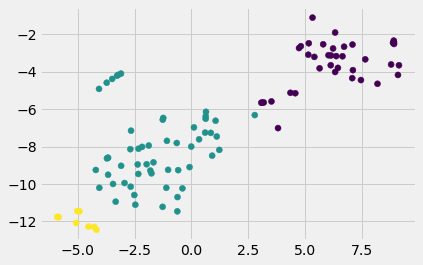

In [67]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

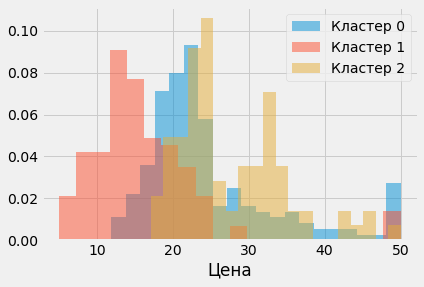

In [26]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)


plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

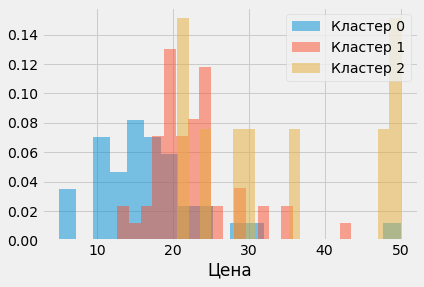

In [68]:
plt.hist(y_test[labels_test == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 2], bins=20, density=True, alpha=0.5)


plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()